# Descarga del dataset BCN20000 desde Kaggel

In [ ]:
import os
import zipfile

# Extraer los archivos del dataset BCN20000
with zipfile.ZipFile("BCN20000.zip", "r") as zip_ref:
    zip_ref.extractall("dataset")

In [3]:
import os
print(os.listdir("dataset"))

['BCN_20k_test', 'bcn_20k_test.csv', 'BCN_20k_train', 'bcn_20k_train.csv']


In [4]:
import pandas as pd

# Ruta del archivo CSV
csv_train = "dataset/bcn_20k_train.csv"
csv_test = "dataset/bcn_20k_test.csv"

# Cargar los datos
df_train = pd.read_csv(csv_train)
df_test = pd.read_csv(csv_test)

# Mostrar algunas filas
print(df_train.head())
print(df_test.head())

# Esto te permitirá ver cómo están organizadas las etiquetas. 
# Normalmente, el CSV tendrá columnas como "image_name" (nombre del archivo de la imagen) 
# y "label" (la clase a la que pertenece la imagen).



         bcn_filename  age_approx anatom_site_general diagnosis    lesion_id  \
0  BCN_0000000001.jpg        55.0      anterior torso       MEL  BCN_0003884   
1  BCN_0000000003.jpg        50.0      anterior torso       MEL  BCN_0000019   
2  BCN_0000000004.jpg        85.0           head/neck       SCC  BCN_0003499   
3  BCN_0000000006.jpg        60.0      anterior torso        NV  BCN_0003316   
4  BCN_0000000010.jpg        30.0      anterior torso       BCC  BCN_0004874   

  capture_date     sex  split  
0   2012-05-16    male  train  
1   2015-07-09  female  train  
2   2015-11-23    male  train  
3   2015-06-16    male  train  
4   2014-02-18  female  train  
         bcn_filename  age_approx anatom_site_general  diagnosis lesion_id  \
0  BCN_0000000000.jpg        60.0      anterior torso        NaN   BCN4657   
1  BCN_0000000002.jpg        50.0     lower extremity        NaN    BCN689   
2  BCN_0000000005.jpg        35.0           head/neck        NaN    BCN481   
3  BCN_00000000

In [5]:
# Lista de carpetas donde están las imágenes
folders = ["dataset/BCN_20k_test", "dataset/BCN_20k_train"]

# Contar archivos en cada carpeta
for folder in folders:
    folder_path = os.path.join(os.getcwd(), folder)  # Ruta completa
    if os.path.exists(folder_path):  # Verificar si la carpeta existe
        num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        print(f"📂 {folder}: {num_files} imágenes")
    else:
        print(f"⚠️ La carpeta {folder} no existe")

📂 dataset/BCN_20k_test: 6501 imágenes
📂 dataset/BCN_20k_train: 12413 imágenes


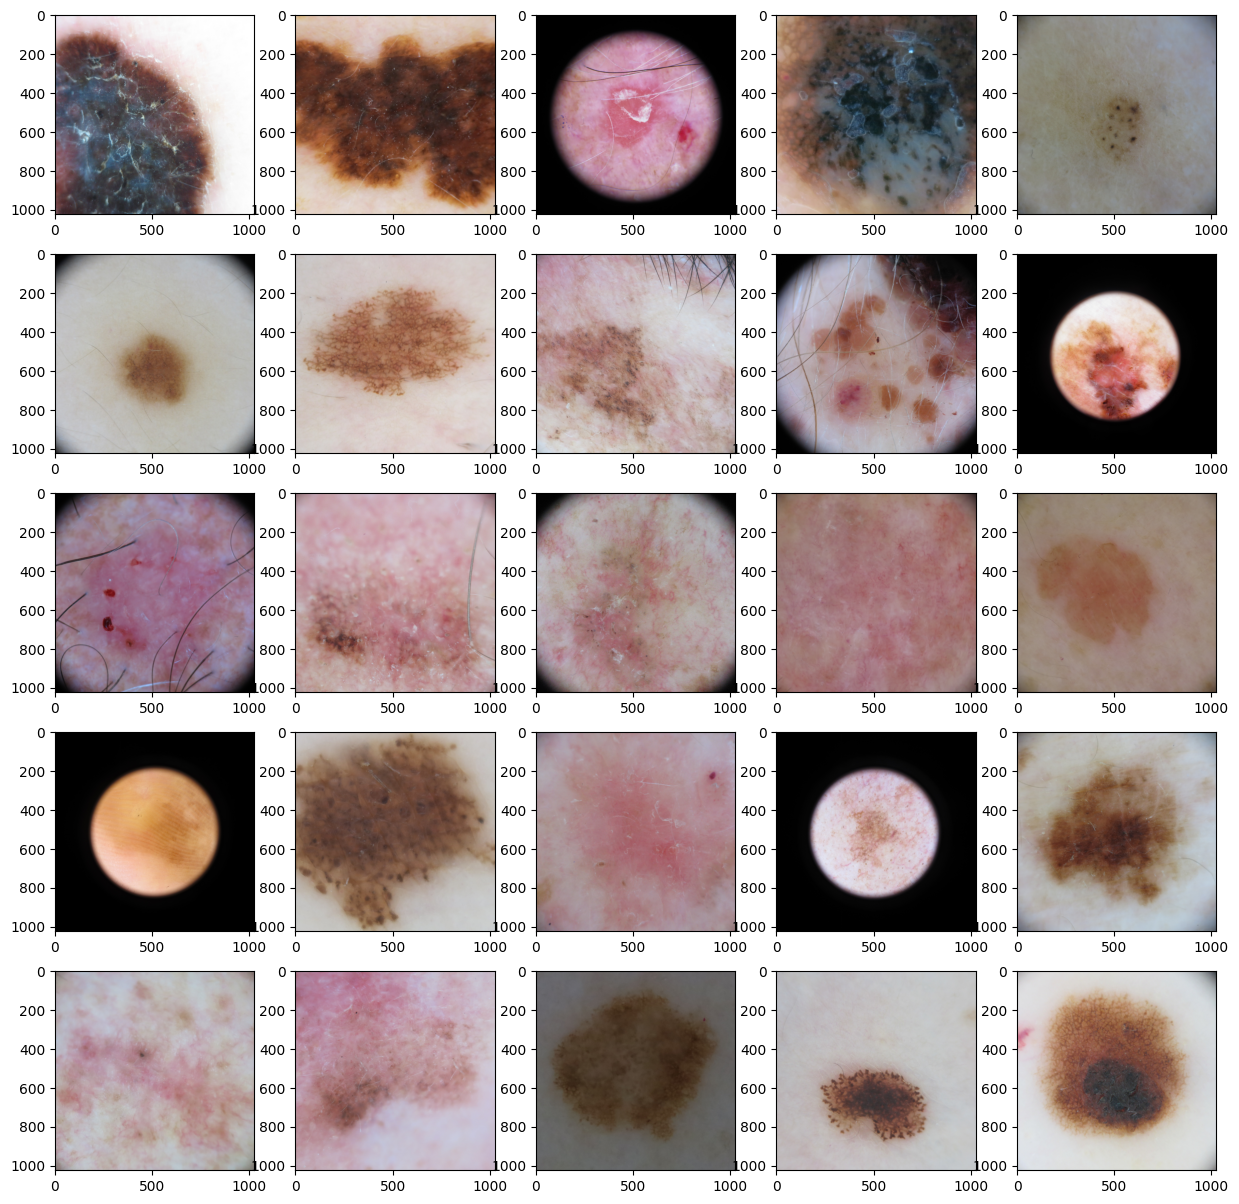

In [6]:
#Mostrar algunas imagenes con pyplot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = 'dataset/BCN_20k_train'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [26]:
#COMPROBACIONES 2

print(train_df["diagnosis"].unique())
# print(test_df["diagnosis"].unique())

['MEL' 'SCC' 'NV' 'BCC' 'BKL' 'AK' 'DF' 'VASC']


In [ ]:
#COMPROBACIONES 3

# Verifica si los archivos realmente existen
print(train_df["bcn_filename"].apply(lambda x: os.path.exists(x)).value_counts())

bcn_filename
True    12413
Name: count, dtype: int64



Found 9931 validated image filenames belonging to 8 classes.
Found 2482 validated image filenames belonging to 8 classes.


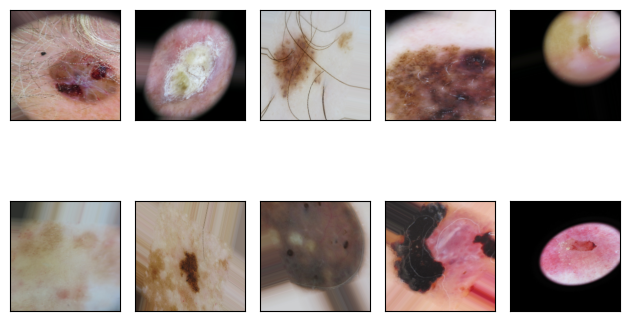

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargar los CSVs con las etiquetas
train_df = pd.read_csv("dataset/bcn_20k_train.csv")

# Filtrar filas con etiquetas válidas
train_df = train_df[train_df["diagnosis"].notna()]
train_df["diagnosis"] = train_df["diagnosis"].astype(str).str.strip()

# Añadir la ruta completa a las imágenes
train_df["bcn_filename"] = train_df["bcn_filename"].apply(lambda x: os.path.join("dataset/BCN_20k_train", x))

# Aumento de datos con ImageDataGenerator + validación automática (20%)
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=15,
    zoom_range=[0.5, 1.5],
    validation_split=0.2  # ← Aquí se divide el DataFrame
)

# Generadores para entrenamiento y validación
data_gen_entrenamiento = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="bcn_filename",
    y_col="diagnosis",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    subset="training"  # ← 80%
)

data_gen_validacion = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="bcn_filename",
    y_col="diagnosis",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False,
    subset="validation"  # ← 20%
)

# Visualizar 10 imágenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imagen[i])
    break
plt.tight_layout()
plt.show()

In [11]:
#COMPROBACIONES 1

print(train_df["diagnosis"].isnull().sum())  # Verifica cuántos NaN hay
print(train_df["diagnosis"].str.strip().eq("").sum())  # Verifica cuántos vacíos

# Convertimos diagnosis a string
train_df["diagnosis"] = train_df["diagnosis"].astype(str).str.strip()
# test_df["diagnosis"] = test_df["diagnosis"].astype(str).str.strip()

# Reemplazamos valores nulos o vacíos de forma segura
train_df.loc[train_df["diagnosis"].isin(["nan", "NaN", ""]), "diagnosis"] = "Desconocido"
# test_df.loc[test_df["diagnosis"].isin(["nan", "NaN", ""]), "diagnosis"] = "Desconocido"

0
0


In [ ]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))
# Aquí se indica que las imágenes son de tamaño 224x224 con 3 canales (RGB)

In [17]:
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [20]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(8, activation='softmax')
]) # Dense(8), se indica que hay 8 categorías entre las que clasificar.

In [21]:
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_3 (Dense)             (None, 8)                 10248     
                                                                 
Total params: 2268232 (8.65 MB)
Trainable params: 10248 (40.03 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [22]:
#Compilar como siempre
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Entrenar el modelo
EPOCAS = 50

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS,
    
    validation_data=data_gen_validacion
)

Epoch 1/50



311/311 [==============================] - ETA: 0s - batch: 155.0000 - size: 31.9325 - loss: 1.3590 - accuracy: 0.5105

c:\Users\dekad\Desktop\GrupoStudium\3. Segundo DAM\7. Proyecto integrado\Espacio de trabajo\venv\lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


311/311 [==============================] - 558s 2s/step - batch: 155.0000 - size: 31.9325 - loss: 1.3589 - accuracy: 0.5105 - val_loss: 1.2513 - val_accuracy: 0.5234
Epoch 2/50
311/311 [==============================] - 381s 1s/step - batch: 155.0000 - size: 31.9325 - loss: 1.2106 - accuracy: 0.5638 - val_loss: 1.1584 - val_accuracy: 0.5890
Epoch 3/50
311/311 [==============================] - 382s 1s/step - batch: 155.0000 - size: 31.9325 - loss: 1.1701 - accuracy: 0.5740 - val_loss: 1.1516 - val_accuracy: 0.5818
Epoch 4/50
311/311 [==============================] - 381s 1s/step - batch: 155.0000 - size: 31.9325 - loss: 1.1537 - accuracy: 0.5803 - val_loss: 1.1367 - val_accuracy: 0.5886
Epoch 5/50
311/311 [==============================] - 378s 1s/step - batch: 155.0000 - size: 31.9325 - loss: 1.1334 - accuracy: 0.5851 - val_loss: 1.1305 - val_accuracy: 0.5854
Epoch 6/50
311/311 [==============================] - 377s 1s/step - batch: 155.0000 - size: 31.9325 - loss: 1.1122 - accuracy

acc = [0.5105226039886475, 0.5637901425361633, 0.5739603042602539, 0.5803040862083435, 0.5851374268531799, 0.5952069163322449, 0.5953076481819153, 0.599637508392334, 0.6004430651664734, 0.603665292263031, 0.5991340279579163, 0.6009465456008911, 0.6079951524734497, 0.6111167073249817, 0.6105125546455383, 0.6026583313941956, 0.6151444911956787, 0.6152451634407043, 0.6122243404388428, 0.6136340498924255, 0.6130298972129822, 0.6174604892730713, 0.6201792359352112, 0.6073909997940063, 0.6167556047439575, 0.6222938299179077, 0.6227973103523254, 0.6220924258232117, 0.6152451634407043, 0.6104118227958679, 0.6173597574234009, 0.6136340498924255, 0.6181653141975403, 0.6190716028213501, 0.6248111724853516, 0.6183667182922363, 0.6154465675354004, 0.6259188652038574, 0.6199778318405151, 0.6171584129333496, 0.618870198726654, 0.6170576810836792, 0.6216896772384644, 0.6194743514060974, 0.6147417426109314, 0.621991753578186, 0.620884120464325, 0.625818133354187, 0.6206827163696289, 0.620884120464325],

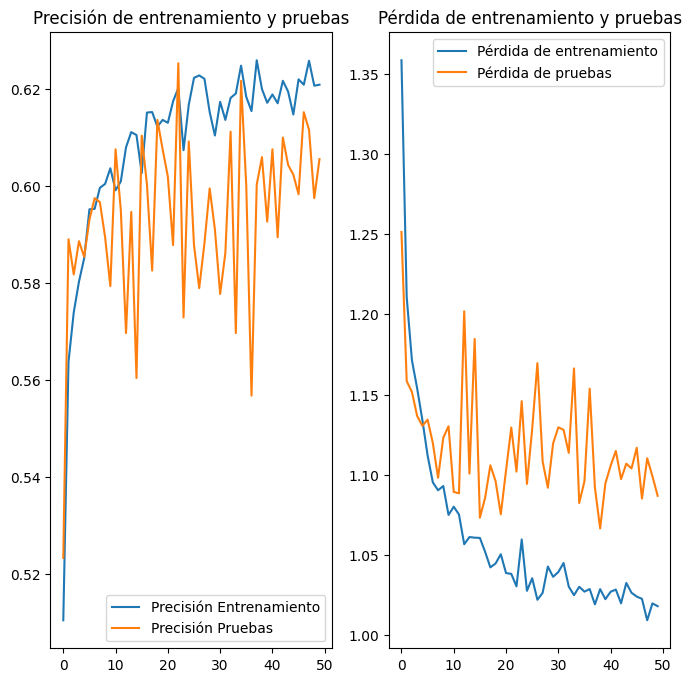

In [24]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

print('acc = ' + str(acc) + ', val_acc = ' + str(val_acc) + ', loss = ' + str(loss) + ', val_loss = ' + str(val_loss))

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [33]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2
import numpy as np

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

'MEL = 0'   → Melanoma  
'SCC = 1'   → Carcinoma de células escamosas  
'NV  = 2'   → Nevus (lunar benigno)  
'BCC = 3'   → Carcinoma basocelular  
'BKL = 4'   → Léntigo solar / Queratosis seborreica (lesiones benignas pigmentadas)  
'AK  = 5'   → Queratosis actínica  
'DF  = 6'   → Dermatofibroma  
'VASC= 7'   → Lesión vascular  

In [39]:
# ['MEL = 0' 'SCC = 1' 'NV = 2' 'BCC = 3' 'BKL= ' 'AK= 5' 'DF= 6' 'VASC= 7']
url = 'https://skinive.com/wp-content/uploads/2022/05/0020dffd6fec4b46a8091b11a9bfd4fd_2364188283709895.jpg' 
prediccion = categorizar (url)
print(prediccion)

5


# Ordenar imágenes por patología

In [45]:
import shutil

# Paths
csv_path = 'dataset/bcn_20k_train.csv'
images_folder = 'dataset/BCN_20k_train'
output_folder = 'dataset/dataset_ordenado'

# Cargar CSV
df = pd.read_csv(csv_path)

# Asegurarse que las columnas necesarias existen
assert 'bcn_filename' in df.columns and 'diagnosis' in df.columns, "Faltan columnas necesarias"

# Crear carpetas por categoría si no existen
categorias = df['diagnosis'].unique()
for categoria in categorias:
    os.makedirs(os.path.join(output_folder, categoria), exist_ok=True)

# Mover/Copiar imágenes
for _, row in df.iterrows():
    imagen = row['bcn_filename']
    categoria = row['diagnosis']
    
    src_path = os.path.join(images_folder, imagen)
    dst_path = os.path.join(output_folder, categoria, imagen)
    
    if os.path.exists(src_path):
        shutil.copy(src_path, dst_path)  # o usa shutil.move() si quieres moverlas
    else:
        print(f"Imagen no encontrada: {src_path}")